In [1]:
import re
import os
from tqdm import tqdm

### Reading Original and Predicted SUmmary File

In [2]:
with open('pred_mlp.txt','r') as file:
    predicted=file.readlines()
    predicted=[re.sub('\n','',i) for i in predicted]

with open('t-tgt-test.txt','r') as file:
    original=file.readlines()
    original=[re.sub('\n','',i) for i in original]

### Calculating individual summary bleu score

In [3]:
os.remove('bleu_indi.txt')      #
os.remove('orig.txt')           # Comment these lines if they give error
os.remove('pr.txt')             #
score=[]
with open('individual_bleu','w') as bleu:
    for i in tqdm(range(len(predicted))):
        with open('orig.txt','w') as orig:
            orig.write(original[i])
        with open('pr.txt','w') as pr:
            pr.write(predicted[i])
        bleu_command='perl multi-bleu.perl orig.txt < pr.txt > bleu_indi.txt'
        os.system(bleu_command)
        with open('bleu_indi.txt','r') as file:
            bleu_scr=file.read()
        bleu_score=float((((bleu_scr.split())[3]).split('/'))[0])
        score.append(bleu_score)
        bleu.write(str(bleu_score) +'\n')
        os.remove('bleu_indi.txt')
        os.remove('orig.txt')
        os.remove('pr.txt')

100%|██████████| 10245/10245 [01:44<00:00, 98.44it/s]


In [5]:
score

[14.3,
 27.3,
 18.8,
 14.3,
 16.7,
 20.0,
 61.5,
 16.7,
 57.1,
 58.8,
 25.0,
 76.5,
 30.8,
 35.3,
 30.4,
 26.7,
 25.0,
 52.9,
 20.0,
 41.2,
 25.0,
 7.7,
 18.8,
 22.7,
 94.4,
 41.7,
 55.6,
 33.3,
 15.4,
 20.0,
 46.2,
 66.7,
 61.5,
 55.6,
 34.6,
 47.6,
 0.0,
 47.4,
 53.8,
 26.7,
 41.2,
 33.3,
 36.4,
 50.0,
 30.8,
 5.0,
 20.0,
 14.3,
 26.7,
 35.3,
 50.0,
 25.0,
 27.8,
 8.3,
 33.3,
 65.0,
 27.8,
 58.3,
 71.4,
 53.3,
 6.2,
 14.3,
 58.3,
 29.2,
 21.1,
 31.6,
 19.0,
 33.3,
 25.0,
 40.0,
 47.1,
 35.3,
 25.0,
 23.1,
 75.0,
 16.7,
 72.7,
 57.1,
 57.1,
 37.5,
 21.7,
 55.6,
 66.7,
 55.0,
 15.4,
 34.6,
 38.5,
 16.7,
 100.0,
 37.5,
 56.5,
 16.7,
 20.0,
 53.3,
 31.2,
 33.3,
 46.2,
 71.4,
 33.3,
 15.4,
 69.6,
 15.0,
 34.8,
 29.4,
 31.6,
 60.0,
 56.2,
 33.3,
 53.3,
 29.6,
 38.9,
 52.9,
 38.1,
 29.4,
 75.0,
 33.3,
 0.0,
 30.4,
 77.8,
 35.3,
 66.7,
 25.0,
 36.8,
 57.9,
 28.6,
 47.6,
 52.9,
 6.7,
 69.6,
 11.1,
 35.3,
 22.2,
 23.8,
 33.3,
 30.0,
 29.4,
 54.5,
 55.0,
 27.8,
 30.8,
 15.4,
 0.0,
 15.4,
 31.6,

In [6]:
with open('individual_bleu','r') as file:
    bleu=file.readlines()
    bleu=[float(re.sub('\n','',i)) for i in bleu]

In [7]:
bleu

[14.3,
 27.3,
 18.8,
 14.3,
 16.7,
 20.0,
 61.5,
 16.7,
 57.1,
 58.8,
 25.0,
 76.5,
 30.8,
 35.3,
 30.4,
 26.7,
 25.0,
 52.9,
 20.0,
 41.2,
 25.0,
 7.7,
 18.8,
 22.7,
 94.4,
 41.7,
 55.6,
 33.3,
 15.4,
 20.0,
 46.2,
 66.7,
 61.5,
 55.6,
 34.6,
 47.6,
 0.0,
 47.4,
 53.8,
 26.7,
 41.2,
 33.3,
 36.4,
 50.0,
 30.8,
 5.0,
 20.0,
 14.3,
 26.7,
 35.3,
 50.0,
 25.0,
 27.8,
 8.3,
 33.3,
 65.0,
 27.8,
 58.3,
 71.4,
 53.3,
 6.2,
 14.3,
 58.3,
 29.2,
 21.1,
 31.6,
 19.0,
 33.3,
 25.0,
 40.0,
 47.1,
 35.3,
 25.0,
 23.1,
 75.0,
 16.7,
 72.7,
 57.1,
 57.1,
 37.5,
 21.7,
 55.6,
 66.7,
 55.0,
 15.4,
 34.6,
 38.5,
 16.7,
 100.0,
 37.5,
 56.5,
 16.7,
 20.0,
 53.3,
 31.2,
 33.3,
 46.2,
 71.4,
 33.3,
 15.4,
 69.6,
 15.0,
 34.8,
 29.4,
 31.6,
 60.0,
 56.2,
 33.3,
 53.3,
 29.6,
 38.9,
 52.9,
 38.1,
 29.4,
 75.0,
 33.3,
 0.0,
 30.4,
 77.8,
 35.3,
 66.7,
 25.0,
 36.8,
 57.9,
 28.6,
 47.6,
 52.9,
 6.7,
 69.6,
 11.1,
 35.3,
 22.2,
 23.8,
 33.3,
 30.0,
 29.4,
 54.5,
 55.0,
 27.8,
 30.8,
 15.4,
 0.0,
 15.4,
 31.6,

In [8]:
import os 
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

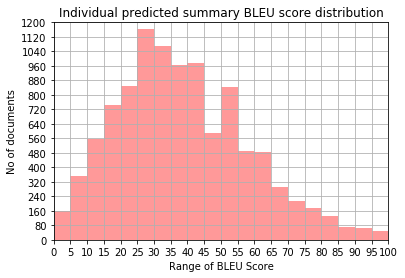

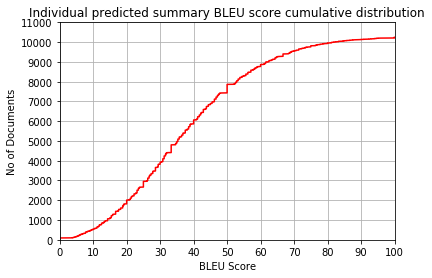

In [42]:
    
# Word Distribution of source train articles
sns.distplot(bleu, bins=20,kde=False,color="r")
plt.xlim(0,100)
plt.ylim(0,1200)
plt.xticks(np.arange(0,101,step=5))
plt.yticks(np.arange(0,1201,step=80))
plt.title('Individual predicted summary BLEU score distribution')
plt.xlabel("Range of BLEU Score")
plt.ylabel("No of documents")
plt.grid()
plt.savefig("bleu-hist.png")
plt.show()


#################################################


x=np.sort(bleu)
plt.plot(x,np.arange(len(x)),'r',label="Cumulative Distribution")
plt.xlim(0,100)
plt.ylim(0,11000)
plt.xticks(np.arange(0,101,step=10))
plt.yticks(np.arange(0,11001,step=1000))
plt.title("Individual predicted summary BLEU score cumulative distribution")
plt.ylabel("No of Documents")
plt.xlabel("BLEU Score")
plt.grid()
#plt.legend()
plt.savefig("bleu-cumsum.png")
plt.show()